<a href="https://colab.research.google.com/github/marijnwolf/marijnwolf/blob/master/week_4_exercise_Marijn_Wolf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

--2020-03-09 17:41:12--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’

root_v6.13.08.Linux 100%[===================>] 131.05M  92.7MB/s    in 1.4s    

2020-03-09 17:41:13 (92.7 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’ saved [137415272/137415272]



In [0]:
#we are going to make a directory called APPS
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

In [3]:
##now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

#ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libPyRoot.so')



ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 55d7981f7e00 at 7f9293afc410>

Welcome to JupyROOT 6.13/08


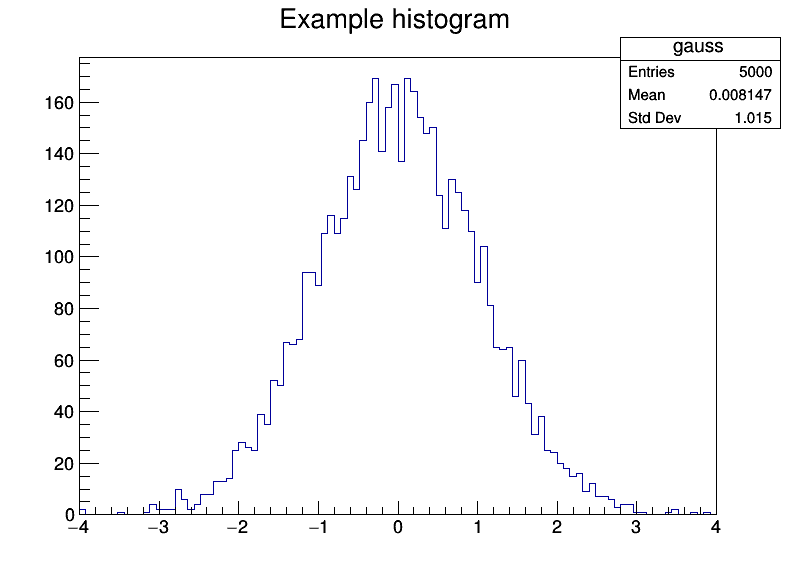

In [4]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

In [5]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')


--2020-03-09 17:41:28--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.82.144, 188.184.93.89, 188.184.28.138, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.82.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  64.5MB/s    in 6.4s    

2020-03-09 17:41:35 (66.7 MB/s) - ‘B2HHH_MagnetUp.root’ saved [444723234/444723234]



<CDLL '/content/APPS/root/lib/libGraf3d.so', handle 55d79d456500 at 7f92a3b1a5d0>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


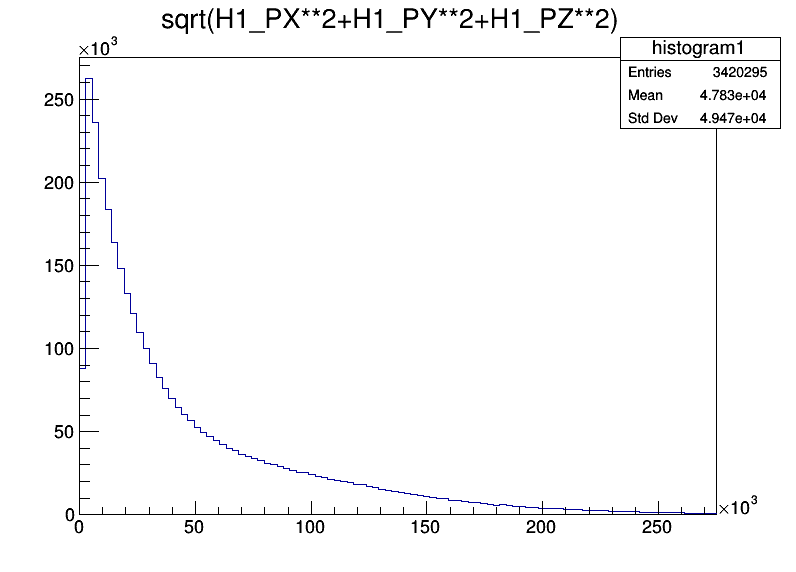

In [6]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
# Now we create a canvas, plot our data onto the canvas and draw it:

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("sqrt(H1_PX**2+H1_PY**2+H1_PZ**2)>>histogram1(100,0,275000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

In [0]:
#H1 is the detected daughter particle (so a Kaon or a Pion), not the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.

#For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

In [8]:
####We need to tell Python what the total momentum is defined as mathematically - do that in this code block:
from numpy import *
import numpy as np
from math import *

#Hint: I suggest we define a function which we might want to use later - something like:


def p_tot_daughter(daughter):
  p_tot = "sqrt(("+daughter +"_PX)**2 + ("+daughter +"_PY)**2 + ("+daughter +"_PZ)**2)"
  return p_tot
 

p_tot_daughter("H1")




p_tot_daughter('H2')

'sqrt((H2_PX)**2 + (H2_PY)**2 + (H2_PZ)**2)'

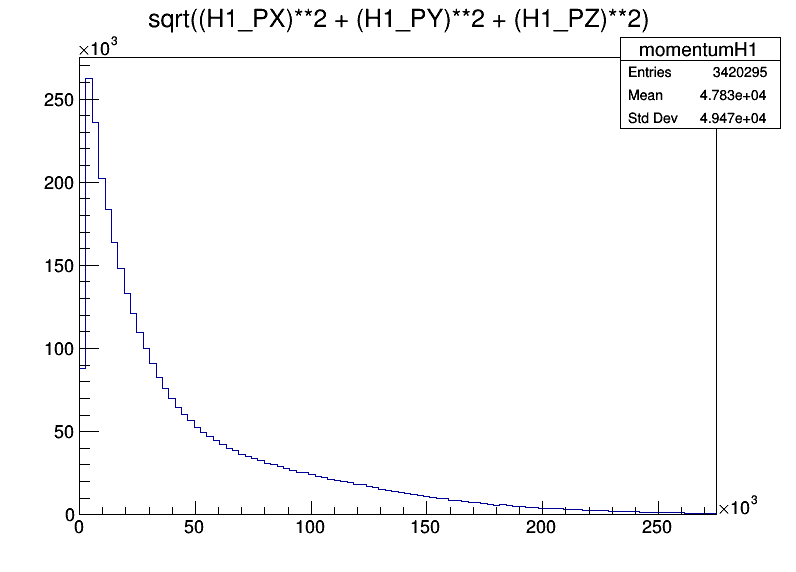

In [9]:
#use the histogram plotting tools, call your function to find the total momentum and then plot it!\

#defining the 3 diff particles
p1 = "H1"
p2 = "H2"
p3 = "H3"

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")

tree=f.Get("DecayTree")

### H1 histo
c1 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p1)+">>momentumH1(100,0,275000)")
histogram1 = ROOT.gDirectory.Get("momentumH1")
c1.Draw()




Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentums of particles


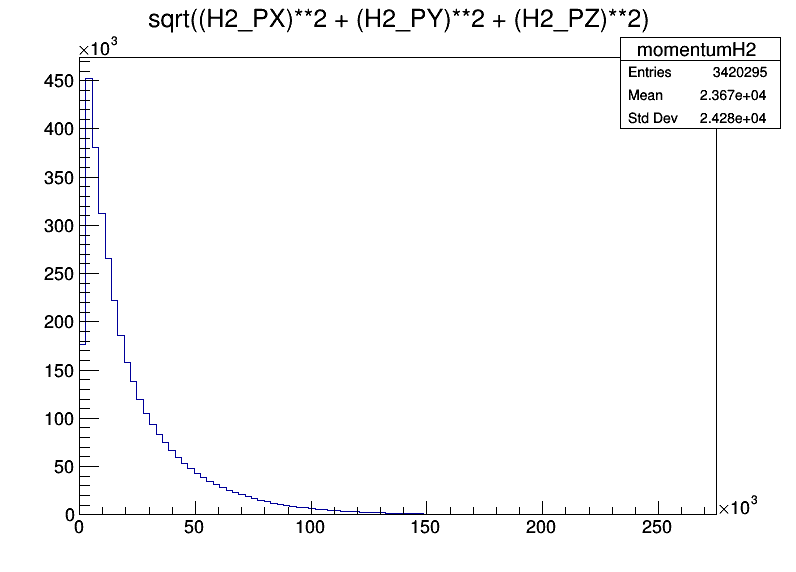

In [10]:
### H2 histo
c2 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p2)+">>momentumH2(100,0,275000)")
histogram2 = ROOT.gDirectory.Get("momentumH2")
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentums of particles


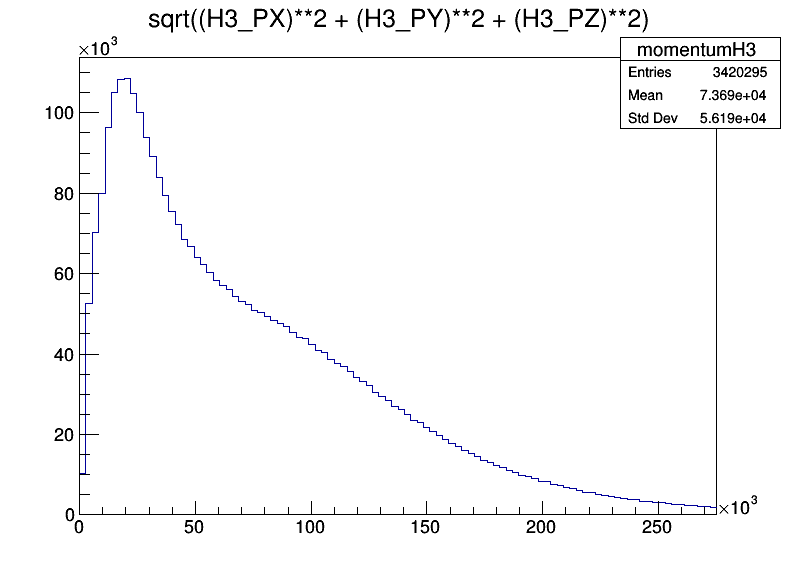

In [11]:
### H3 histo
c3 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p3)+">>momentumH3(100,0,275000)")
histogram3 = ROOT.gDirectory.Get("momentumH3")
c3.Draw()


The next step is to use the total momentum of the Kaon and its invarient mass to get an equation for the energy of the Kaon and make a plot.

sqrt(sqrt((H1_PX)**2 + (H1_PY)**2 + (H1_PZ)**2)**2 +(493.677)**2)


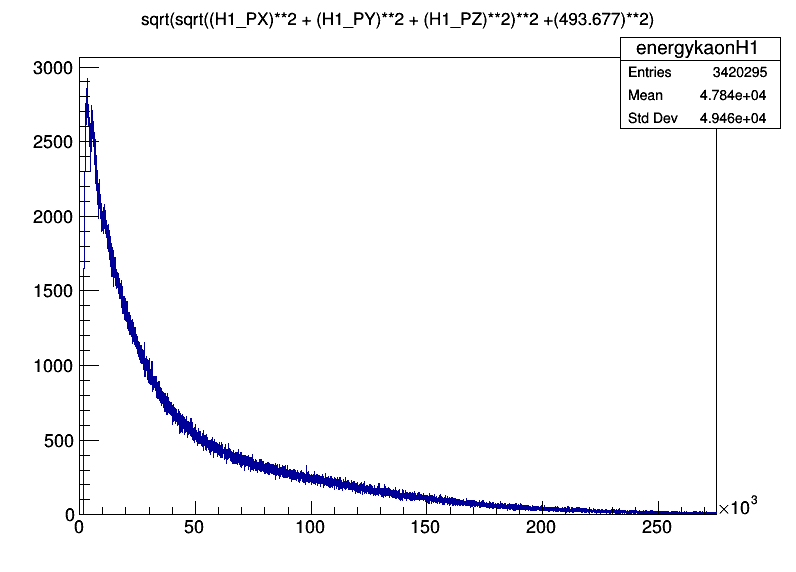

In [12]:
#####Energy calculation

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")

tree=f.Get("DecayTree")

c = 299792458     # m/s
mkaon = 493.677   #meV/c^2

                      
def energy (p1):
  ekeon = "sqrt("+p_tot_daughter(p1)+"**2 +("+str(mkaon)+")**2)"       # (meV/c)
  return ekeon

############draw energy graph for p1
e1 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(energy(p1)+">>energykaonH1(10000,0,275000)")
histogram4 = ROOT.gDirectory.Get("energykaonH1")
e1.Draw()

print (energy(p1))



Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


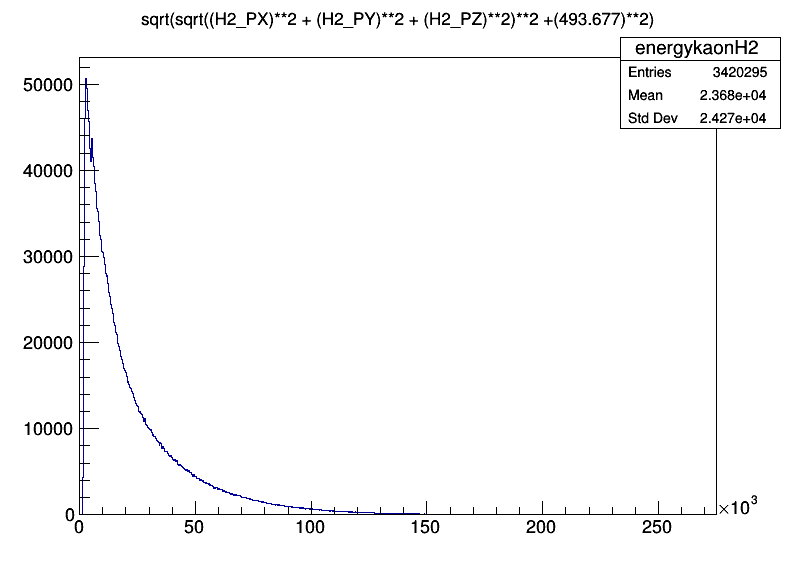

In [13]:
############draw energy graph for p2
e2 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(energy(p2)+">>energykaonH2(1000,0,275000)")
histogram5 = ROOT.gDirectory.Get("energykaonH2")
e2.Draw()



Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


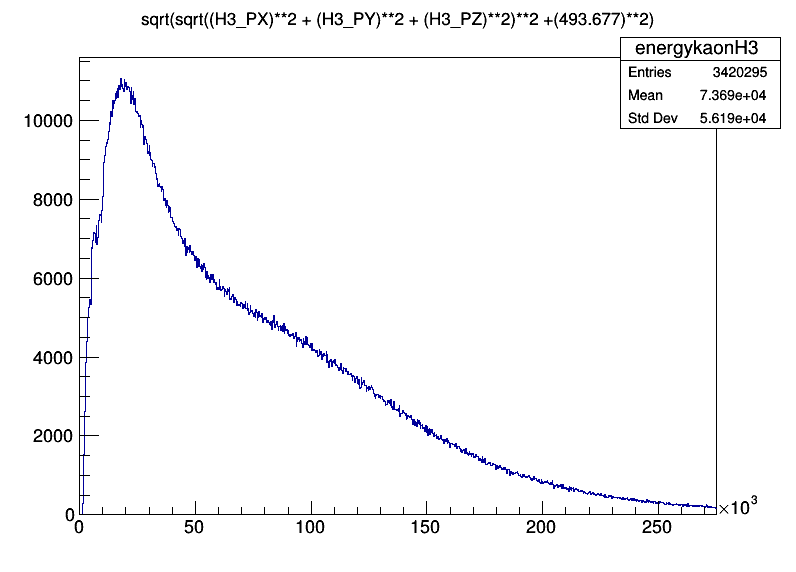

In [14]:
############draw energy graph for p3
e3 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(energy(p3)+">>energykaonH3(1000,0,275000)")
histogram6 = ROOT.gDirectory.Get("energykaonH3")
e3.Draw()


### Part 2

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


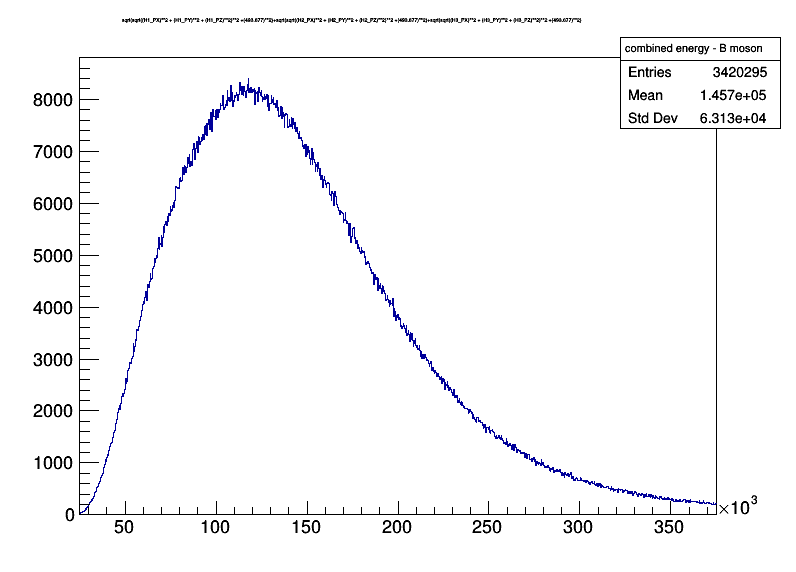

In [15]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total


etot = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw((energy(p1)+"+"+energy(p2)+"+"+energy(p3))+">>combined energy - B moson(1000,25000,375000)")
histogram7 = ROOT.gDirectory.Get("combined energy - B moson")
etot.Draw()
 

sqrt((H1_PX + H2_PX + H3_PX)**2 +(H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)


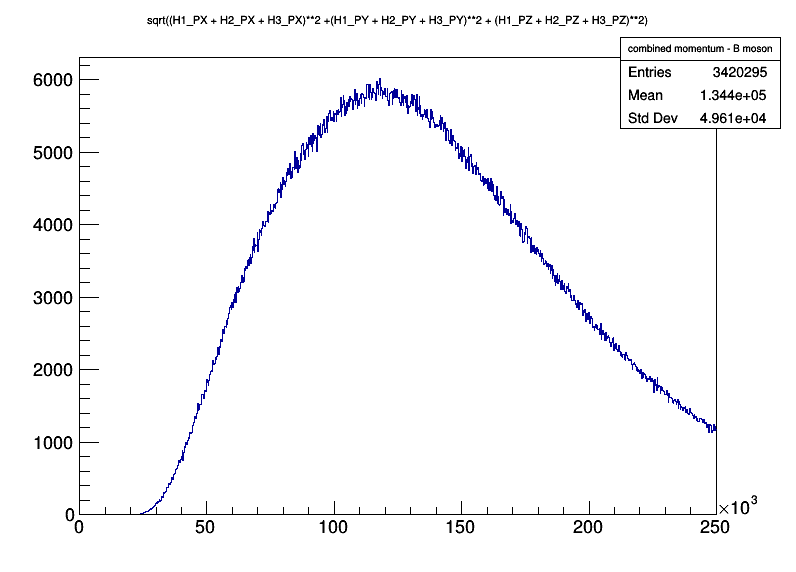

In [16]:
#Calculate the momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
#to get a total x momentum of the mother; then you can combine your three momenta into total momentum

x_momentum_b = "H1_PX + H2_PX + H3_PX"
y_momentum_b = "H1_PY + H2_PY + H3_PY"
z_momentum_b = "H1_PZ + H2_PZ + H3_PZ"
tot_momentum_b = "sqrt(("+x_momentum_b+")**2 +("+y_momentum_b+")**2 + ("+z_momentum_b+")**2)"
print (tot_momentum_b)

totmomentumb = ROOT.TCanvas("momentum","momemtum",800,600)
tree.Draw((tot_momentum_b)+">>combined momentum - B moson(1000,0,250000)")
histogram8 = ROOT.gDirectory.Get("combined momentum - B moson")
totmomentumb.Draw()

### Finding experimental mass
we will get a distribution of masses.
We hope to have a reasonably narrow peak.

sqrt((sqrt(sqrt((H1_PX)**2 + (H1_PY)**2 + (H1_PZ)**2)**2 +(493.677)**2)+sqrt(sqrt((H2_PX)**2 + (H2_PY)**2 + (H2_PZ)**2)**2 +(493.677)**2)+sqrt(sqrt((H3_PX)**2 + (H3_PY)**2 + (H3_PZ)**2)**2 +(493.677)**2))**2 - sqrt((H1_PX + H2_PX + H3_PX)**2 +(H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)**2)


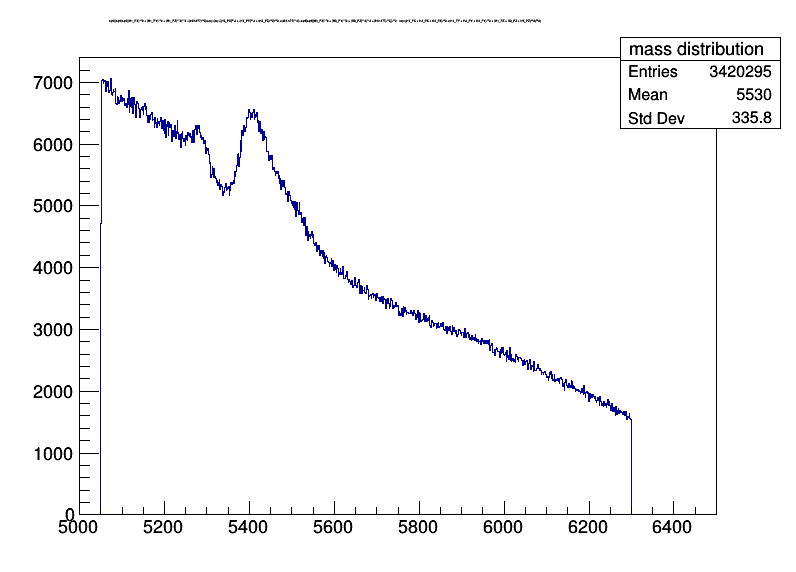

In [17]:
#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)
#(mass = sqrt(Energy^2 - Momentum^2))
b_energy = energy(p1)+"+"+energy(p2)+"+"+energy(p3)
mass_exp_b = "sqrt(("+b_energy+")**2 - "+tot_momentum_b+"**2)"

print (mass_exp_b)

#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?


expmasshisto = ROOT.TCanvas("mass","mass",800,600)
tree.Draw((mass_exp_b)+">>mass distribution(1000,5000,6500)")
histogram9 = ROOT.gDirectory.Get("mass distribution")
expmasshisto.Draw()


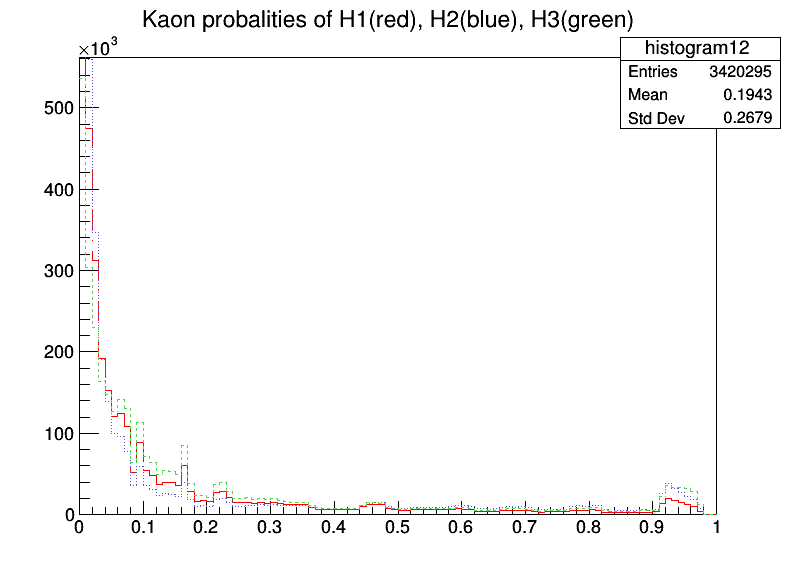

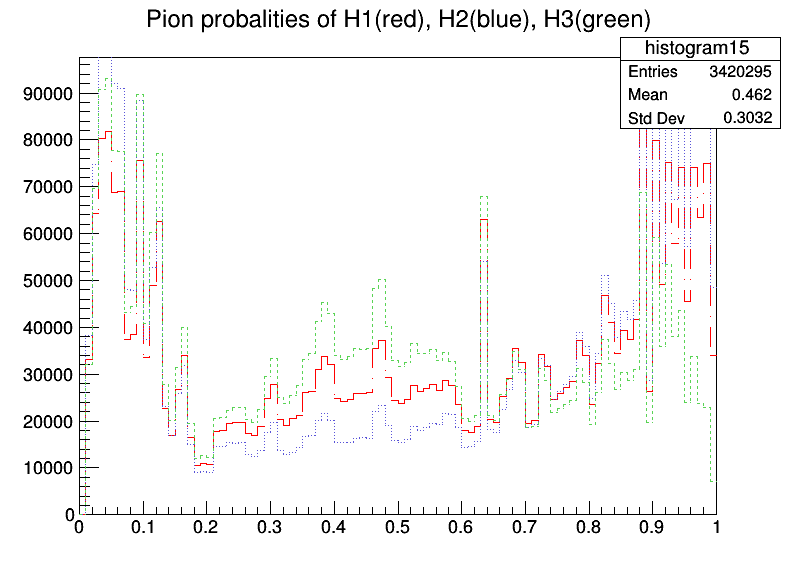

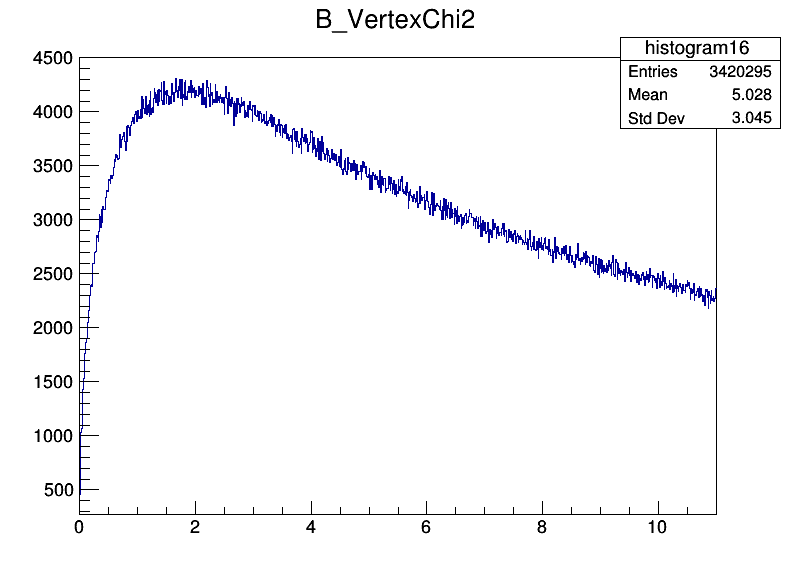

In [18]:

#During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
#The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
#The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex $\chi^2$ (this is the variable B_VertexChi2). 
#This is the statistical measure that determines how well we found a single point to be the source of all three particles.

# Making a selection of the data to cut away unnecasarry data (e.g muons)

#Make plots of H1/H2/H3 _ProbK on one plot
#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2

#https://root.cern.ch/doc/master/classTAttLine.html#a2012d69ad2942b0adcdc3991319b74e1 - used this 
#H1 = RED
#H2 = BLUE
#H3 = GREEN


H1_ProbK = ROOT.gDirectory.Get("H1 ProbK")
H2_ProbK = ROOT.gDirectory.Get("H2 ProbK")
H3_ProbK = ROOT.gDirectory.Get("H3 ProbK")


probK = ROOT.TCanvas("prob K", "probability", 800, 600)
tree.Draw("H1_ProbK"+">>histogram10(100,0,1)")
tree.Draw("H2_ProbK"+">>histogram11(100,0,1)")
tree.Draw("H3_ProbK"+">>histogram12(100,0,1)")
histogram10 = ROOT.gDirectory.Get("histogram10")
histogram11 = ROOT.gDirectory.Get("histogram11")
histogram12 = ROOT.gDirectory.Get("histogram12")
histogram10.Draw('Same')
histogram10.SetLineStyle(10)
histogram10.SetLineColor(2)
histogram11.Draw('Same')
histogram11.SetLineStyle(3)
histogram11.SetLineColor(9)
histogram12.Draw('Same')
histogram12.SetLineStyle(2)
histogram12.SetLineColor(8)
histogram12.SetTitle('Kaon probalities of H1(red), H2(blue), H3(green)')
probK.Draw()

## now for PIONs

H1_ProbPi = ROOT.gDirectory.Get("H1 ProbPi")
H2_ProbPi = ROOT.gDirectory.Get("H1 ProbPi")
H3_ProbPi = ROOT.gDirectory.Get("H1 ProbPi")

probPi = ROOT.TCanvas("prob Pi", "probability", 800, 600)
tree.Draw("H1_ProbPi"+">>histogram13(100,0,1)")
tree.Draw("H2_ProbPi"+">>histogram14(100,0,1)")
tree.Draw("H3_ProbPi"+">>histogram15(100,0,1)")
histogram13 = ROOT.gDirectory.Get("histogram13")
histogram14 = ROOT.gDirectory.Get("histogram14")
histogram15 = ROOT.gDirectory.Get("histogram15")
histogram13.Draw('Same')
histogram13.SetLineStyle(10)
histogram13.SetLineColor(2)
histogram14.Draw('Same')
histogram14.SetLineStyle(3)
histogram14.SetLineColor(9)
histogram15.Draw('Same')
histogram15.SetLineStyle(2)
histogram15.SetLineColor(8)
histogram15.SetTitle('Pion probalities of H1(red), H2(blue), H3(green)')
probPi.Draw()



B_VertexChi2 = ROOT.gDirectory.Get("B VertexChi2")
vertex = ROOT.TCanvas("vertex", "vertex", 800, 600)
tree.Draw("B_VertexChi2"+">>histogram16(1000,0,11)")
histogram16 = ROOT.gDirectory.Get("histogram16")
vertex.Draw()


In [0]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)
selection=("H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cuttmass


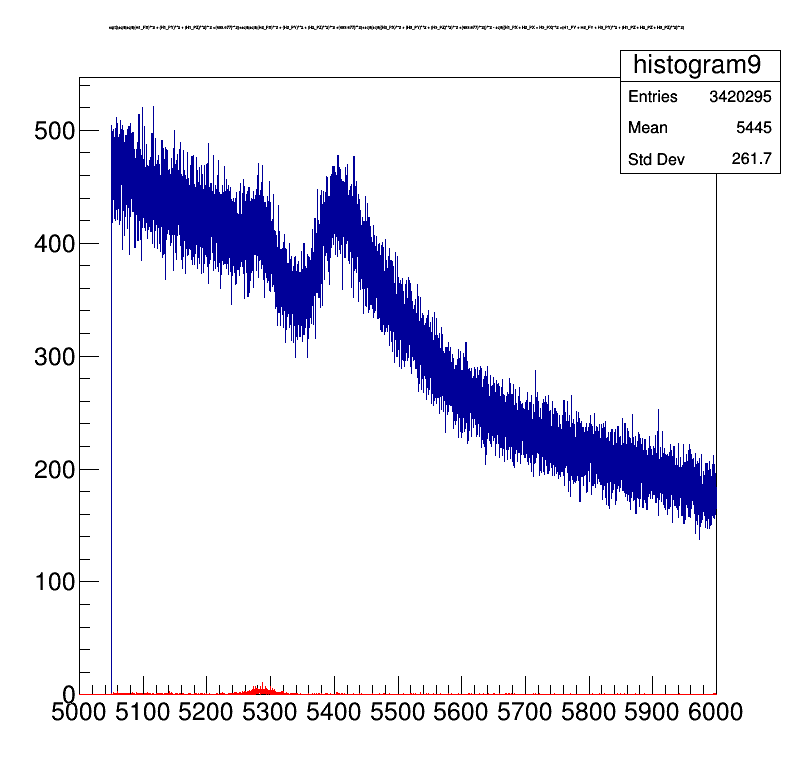

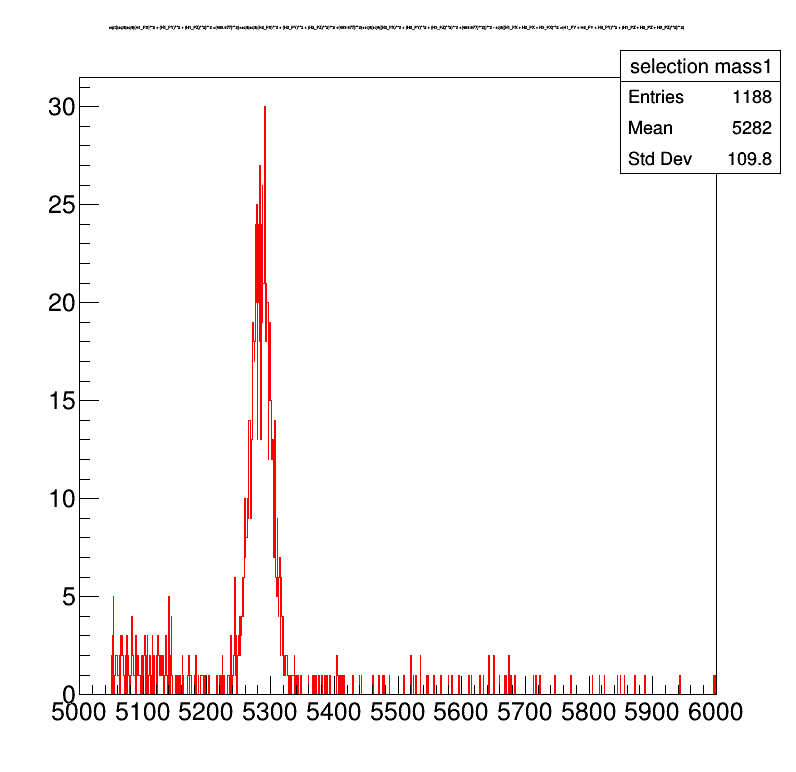

In [21]:
#To apply the selection - we can use the copytree command:

CutTree=tree.CopyTree(selection)
cutmass= ROOT.TCanvas("cuttmass","cuttmass", 800, 800)

CutTree.Draw(mass_exp_b + ">>selection mass(10000,4500,6000)")
tree.Draw((mass_exp_b)+">>histogram9(10000,5000,6000)")

histogram17 = ROOT.gDirectory.Get("selection mass") 
histogram9 = ROOT.gDirectory.Get("histogram9")

histogram9.Draw('Same')
histogram17.Draw('Same')
histogram17.SetLineColor(2)
cutmass.Draw('Same')  

### histogram of ONLY selection (zoom in of red line in other histogram)
CutTree=tree.CopyTree(selection)
cutmass2= ROOT.TCanvas("cuttmass1","cuttmass1", 800, 800)
CutTree.Draw(mass_exp_b + ">>selection mass1(1000,5000,6000)")
histogram18 = ROOT.gDirectory.Get("selection mass1") 
histogram18.SetLineColor(2)
cutmass2.Draw() 



## Number of events

in the following plot,  the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B_Mass): fit range of variable sqrt((sqrt(sqrt((H1_PX)**2 + (H1_PY)**2 + (H1_PZ)**2)**2 +(493.677)**2)+sqrt(sqrt((H2_PX)**2 + (H2_PY)**2 + (H2_PZ)**2)**2 +(493.677)**2)+sqrt(sqrt((H3_PX)**2 + (H3_PY)**2 + (H3_PZ)**2)**2 +(493.677)**2))**2 - sqrt((H1_PX + H2_PX + H3_PX)**2 +(H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)**2) expanded to nearest bin boundaries: [5000,5500] --> [5000,5500]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PA

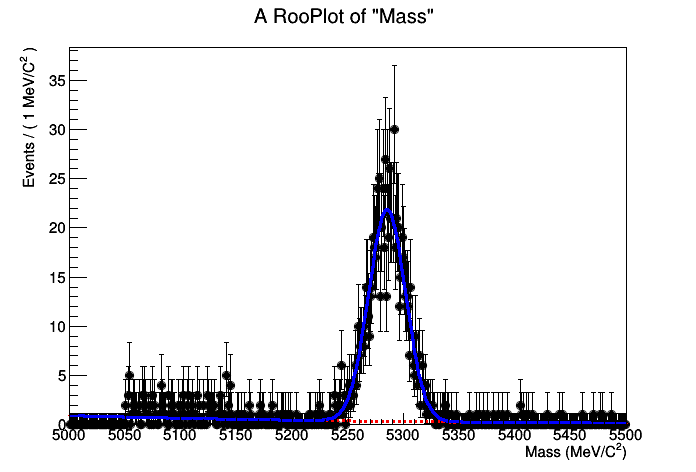

In [22]:
mass = ROOT.RooRealVar(mass_exp_b,"Mass",5000,5500,"MeV/C^{2}")
gauss_mean = ROOT.RooRealVar("gauss_mean","Mean",5300,5200,5350)
gauss_width = ROOT.RooRealVar("gauss_width","Width",3,0,60)
Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gauss_mean,gauss_width)
exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add a scaling factor to fit what ratio of the two are used:

sig_frac=ROOT.RooRealVar("Signal Fraction","sigfrac", 0.1, 0, 1)

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(sig_frac))


data_to_fit=ROOT.RooDataHist("B_Mass", "Mass", ROOT.RooArgList(mass), histogram18, 1.0)

#Then we can do the fitting:

model.fitTo(data_to_fit)

c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()

data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(1),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()

c1.Update()
c1.Draw()

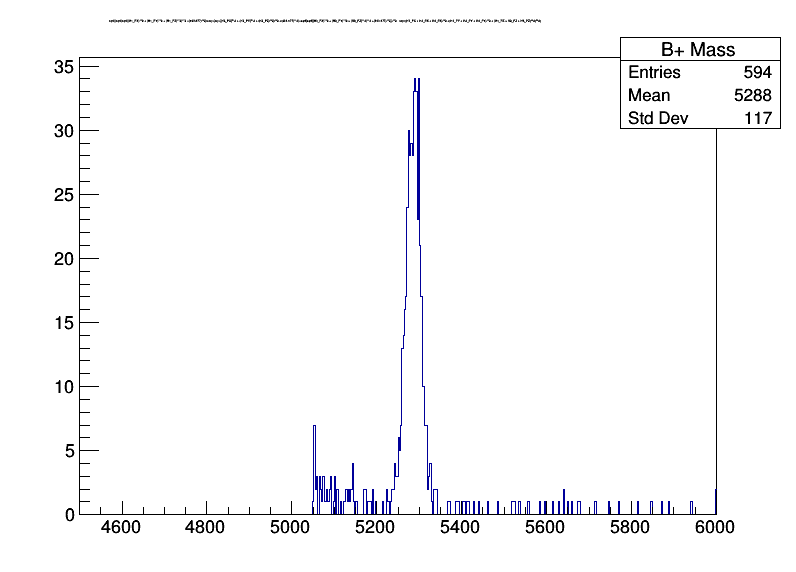

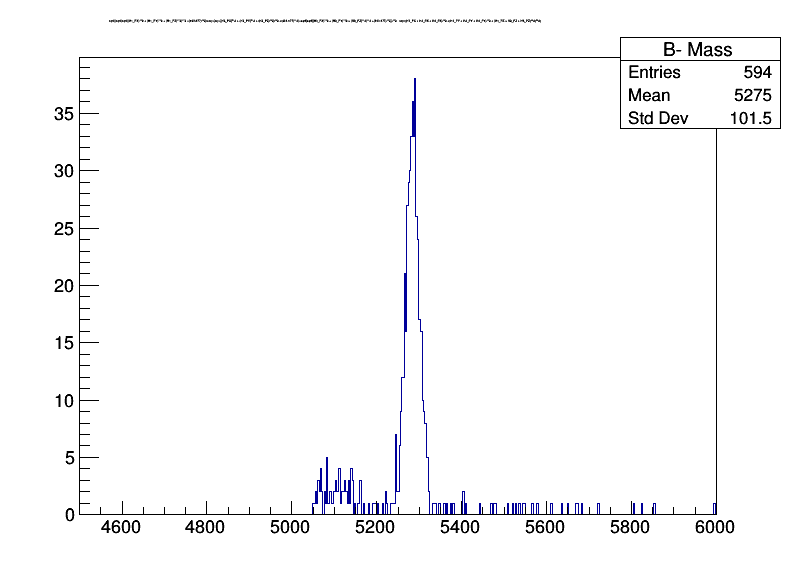

In [24]:
###########Calculating the mass of B+ and B-  and later check the assymetry
## mass of B +

selection=("(H1_Charge+H2_Charge+H3_Charge)>0")
CutTree1=CutTree.CopyTree(selection)
c = ROOT.TCanvas("B+Mass","B+_Mass",800,600)
CutTree1.Draw(mass_exp_b + ">>B+ Mass(500,4500,6000)")
bplusmass_histo = ROOT.gDirectory.Get("B+ Mass")
c.Draw()

## mass of B -

selection=("(H1_Charge+H2_Charge+H3_Charge)<0")
CutTree2=CutTree.CopyTree(selection)
b = ROOT.TCanvas("B-Mass","B-_Mass",800,600)
CutTree2.Draw(mass_exp_b + ">>B- Mass(500,4500,6000)")
bminusmass_histo = ROOT.gDirectory.Get("B- Mass")
b.Draw()

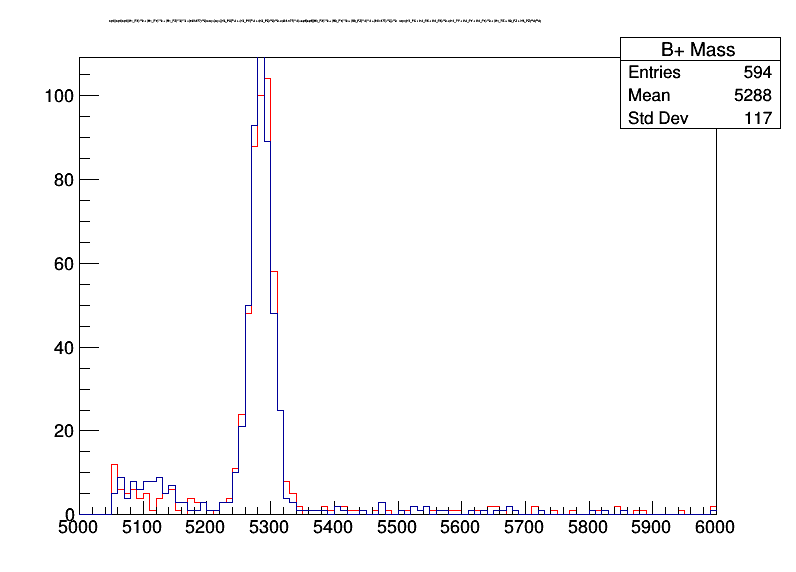

In [25]:
######## to check fo assymetry ill plot both B + and B - in the same graph

c = ROOT.TCanvas("Assymetry","assymetry",800,600)
CutTree1.Draw(mass_exp_b + ">>B+ Mass(100,5000,6000)")
CutTree2.Draw(mass_exp_b + ">>B- Mass(100,5000,6000)")
bplusmass_histo = ROOT.gDirectory.Get("B+ Mass")
bminusmass_histo = ROOT.gDirectory.Get("B- Mass")
bplusmass_histo.Draw()
bplusmass_histo.SetLineColor(2)
bminusmass_histo.Draw('Same')
c.Draw('Same')



#### As you can see below, there is very little assymtetry between B- and B+ but they are not the same!

